In [20]:
import random
import matplotlib.pyplot as plt
# Variables :
taille = 10
mise = 1
gain = 2
gain_triche = 3

In [21]:
# True -> l'individu met une pièce
# False -> l'individu ne met pas de pièce

def gentil(reponse):
    """l'individu qui met tout le temps une pièce"""
    return True

def mechant(reponse):
    """l'individu qui ne met jamais de pièce"""
    return False

def aleatoire(reponse):
    """l'individu qui décide aléatoirement de mettre ou non une pièce"""
    if random.random()*2 >=1:
        return True
    return False

def copieur(reponse):
    """l'individu qui commence par mettre une pièce, puis en met une pièce si la personne en face en a mis une au tour précédent"""
    if reponse or reponse == None:
        return True
    return False



In [22]:
def echange(perso1,argent1,perso2,argent2,r1,r2):
    """simulation d'un échange entre deux individus
    r1 et r2 correspondent aux réponses des deux individus respectifs au tour précédent (None signifie qu'il s'agit du premier 
    tour)"""
    if perso1(r2):
        if perso2(r1):
            print("Les deux individus ont mis une pièce")
            r1 = True
            r2 = True
            return (argent1 + gain, argent2 + gain, r1, r2)
        print("perso2 a triché")
        r1 = True
        r2 = False
        return (argent1 - mise, argent2 + gain_triche, r1, r2)
    if perso2(r1):
        print("perso1 a triché")
        r1 = False
        r2 = True
        return (argent1 + gain_triche, argent2 - mise, r1, r2)
    print("les deux individus ont triché")
    r1 = False
    r2 = False
    return (argent1, argent2, r1, r2)
            

In [23]:
echange(gentil,10,copieur,10,None,None)

Les deux individus ont mis une pièce


(12, 12, True, True)

In [24]:
def tour_echange(perso1,argent1,perso2,argent2,r1,r2,nb_echanges):
    """simulation de nb_echanges entre deux individus"""
    x,y,r1,r2 = echange(perso1,argent1,perso2,argent2,r1,r2)
    for i in range(nb_echanges-1):
        x,y,r1,r2 = echange(perso1,x,perso2,y,r1,r2)
        if x <= 0:
            return ("perso1 ne peut plus jouer",(0,y))
        if y <= 0:
            return ("perso2 ne peut plus jouer",(x,0))   
    return (x,y)
        

In [119]:
tour_echange(gentil,10,mechant,10,None, None, 18)

perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché


('perso1 ne peut plus jouer', (0, 40))

In [172]:
def affichage_argent(perso1,argent1,perso2,argent2,r1,r2,nb_echanges):
    """ """
    liste_argent1 = [argent1]
    liste_argent2 = [argent2]
    x,y,r1,r2 = echange(perso1,argent1,perso2,argent2,r1,r2)
    liste_argent1.append(x)
    liste_argent2.append(y)
    i = 0
    while i < (nb_echanges - 1) and x > 0 and y > 0:
        x,y,r1,r2 = echange(perso1,x,perso2,y,r1,r2)
        liste_argent1.append(x)
        liste_argent2.append(y)
        i+=1
    while len(liste_argent1) < nb_echanges+1:
        liste_argent1.append(x)
        liste_argent2.append(y)
    _ = plt.plot([j for j in range(nb_echanges+1)], liste_argent1)
    _ = plt.plot([k for k in range(nb_echanges+1)],liste_argent2)
    _ = plt.xlabel("Tours")
    _ = plt.ylabel("Argent")
    return (liste_argent1,liste_argent2)

perso2 a triché
les deux individus ont triché
les deux individus ont triché
les deux individus ont triché
les deux individus ont triché
les deux individus ont triché
les deux individus ont triché
les deux individus ont triché
les deux individus ont triché
les deux individus ont triché


([10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
 [10, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13])

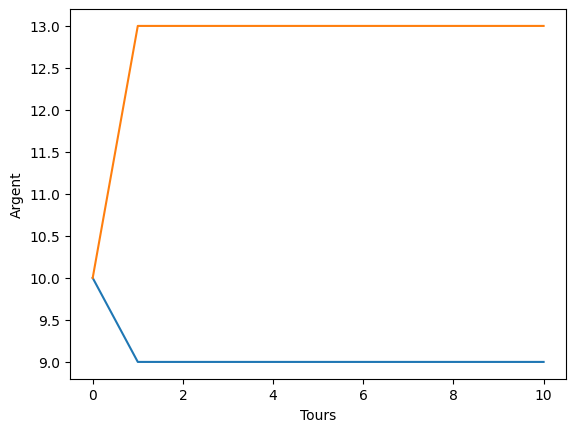

In [173]:
affichage_argent(copieur,10,mechant,10,None, None, 10)

perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché
perso2 a triché


([10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 0],
 [10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 40, 40])

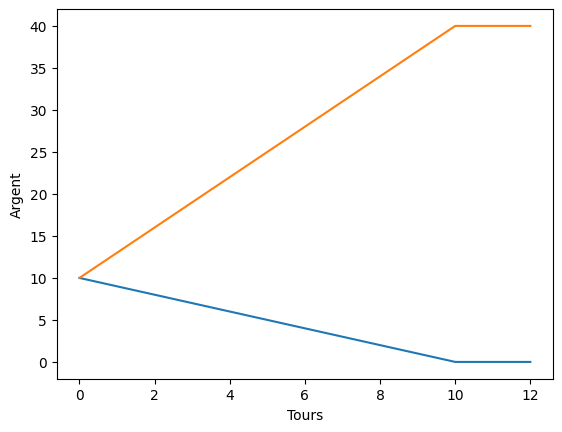

In [177]:
affichage_argent(gentil,10,mechant,10,None, None, 12)

Les deux individus ont mis une pièce
Les deux individus ont mis une pièce
perso2 a triché
perso2 a triché
Les deux individus ont mis une pièce
Les deux individus ont mis une pièce
perso2 a triché
Les deux individus ont mis une pièce
Les deux individus ont mis une pièce
perso2 a triché


([10, 12, 14, 13, 12, 14, 16, 15, 17, 19, 18],
 [10, 12, 14, 17, 20, 22, 24, 27, 29, 31, 34])

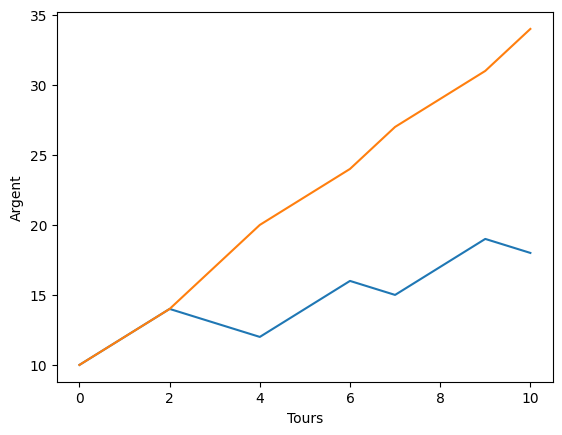

In [153]:
affichage_argent(gentil,10,aleatoire,10,None, None, 10)

Les deux individus ont mis une pièce
perso2 a triché
perso1 a triché
Les deux individus ont mis une pièce
perso2 a triché
les deux individus ont triché
les deux individus ont triché
perso1 a triché
perso2 a triché
perso1 a triché


([10, 12, 11, 14, 16, 15, 15, 15, 18, 17, 20],
 [10, 12, 15, 14, 16, 19, 19, 19, 18, 21, 20])

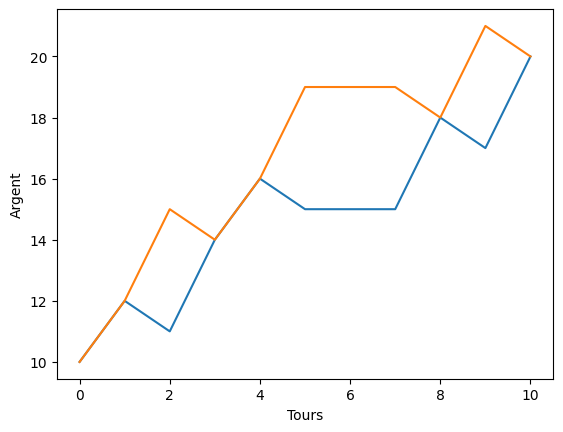

In [171]:
affichage_argent(copieur,10,aleatoire,10,None, None, 10)